#Preparação e Análise Exploratória

In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ConfusionMatrix
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [38]:
dados = pd.read_csv("/content/BRA.csv")
dados.shape

(3466, 19)

In [39]:
dados.columns

Index(['Country', 'League', 'Season', 'Date', 'Time', 'Home', 'Away', 'HG',
       'AG', 'Res', 'PH', 'PD', 'PA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD',
       'AvgA'],
      dtype='object')

In [40]:
dados.head()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [41]:
dados.tail()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
3461,Brazil,Serie A,2021,20/06/2021,22:15,Athletico-PR,Atletico GO,2.0,1.0,H,2.04,3.12,4.47,2.07,3.25,4.58,2.02,2.99,4.29
3462,Brazil,Serie A,2021,20/06/2021,22:15,Fortaleza,Fluminense,1.0,1.0,D,2.39,2.97,3.59,2.40,3.08,3.70,2.33,2.94,3.40
3463,Brazil,Serie A,2021,20/06/2021,22:15,Santos,Sao Paulo,2.0,0.0,H,3.27,3.21,2.41,3.27,3.21,2.50,3.06,3.09,2.41
3464,Brazil,Serie A,2021,21/06/2021,00:30,Juventude,Sport Recife,1.0,0.0,H,2.48,2.97,3.41,2.55,3.10,3.49,2.42,2.93,3.21
3465,Brazil,Serie A,2021,22/06/2021,00:00,Atletico-MG,Chapecoense-SC,1.0,1.0,D,1.29,5.79,10.78,1.31,6.03,11.93,1.28,5.43,10.08


In [42]:
dados.isnull().sum()

Country    0
League     0
Season     0
Date       0
Time       0
Home       0
Away       0
HG         1
AG         1
Res        1
PH         1
PD         1
PA         1
MaxH       0
MaxD       0
MaxA       0
AvgH       0
AvgD       0
AvgA       0
dtype: int64

In [43]:
dados = dados.fillna(0)

In [137]:
dados.isnull().sum()

Country    0
League     0
Season     0
Date       0
Time       0
Home       0
Away       0
HG         0
AG         0
Res        0
PH         0
PD         0
PA         0
MaxH       0
MaxD       0
MaxA       0
AvgH       0
AvgD       0
AvgA       0
id_jogo    0
dtype: int64

In [44]:
dados.duplicated().sum()

0

In [45]:
dados['Res'].value_counts()

H    1708
D     924
A     833
0       1
Name: Res, dtype: int64

In [47]:
dados[dados['Res'] == 0]

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
1891,Brazil,Serie A,2016,11/12/2016,19:00,Chapecoense-SC,Atletico-MG,0.0,0.0,0,0.0,0.0,0.0,2.85,3.3,2.68,2.85,3.3,2.67


In [48]:
dados[dados['Res'] == 0] = 1

In [49]:
layout = go.Layout(title="Resultados das Partidas - H: Vitória time da casa, D: Empate, A: Vitória do visitante", xaxis= {'title':'Resultados'},
                   yaxis=dict(title='Nº de Partidas'), hovermode='closest')
fig = go.Figure(data=[go.Histogram(x=dados['Res'], marker_color='#330C73')], layout=layout)

fig.show()

In [51]:
def transforma_resultado(resultado):
  if resultado == "H":
    return 1
  elif resultado == "D":
    return 0 
  elif resultado == 1:
    return 1
  else:
    return 2

In [52]:
dados['Res'] = dados['Res'].map(transforma_resultado)
dados.head()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,0,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,0,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,1,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,1,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,2,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [53]:
dados['Res'].value_counts(normalize=True)*100

1    49.307559
0    26.658973
2    24.033468
Name: Res, dtype: float64

In [54]:
novos_dados = dados.drop(columns=['Country', 'League', 'Season', 'Date',
'Time', 'Home', 'Away'])

novos_dados.head()

,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,1.0,1.0,0,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,1.0,1.0,0,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,2.0,1.0,1,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,4.0,2.0,1,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,0.0,1.0,2,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [55]:
x = novos_dados.drop(columns=['Res'])
y = novos_dados['Res']

print(x.shape)
print(y.shape)

(3466, 11)
(3466,)


In [59]:
lista_features = ('HG', 'AG', 'PH', 'PD', 'PA', 'MaxH', 'MaxD', 'AvgH', 'AvgD', 'AvgA')

best_features = SelectKBest(k='all')
best_features.fit_transform(x,y)
best_features_score = best_features.scores_
#print(best_features_score)

teste = zip(lista_features[1:], best_features_score)
teste_arrumado = list(reversed(sorted(teste, key=lambda x: x[1])))

final = dict(teste_arrumado[:15])
melhores = final.keys()
print(final)


{'AG': 1134.5211457592575, 'PH': 1111.101426807077, 'PD': 138.0469864123361, 'AvgA': 132.98661455422308, 'MaxH': 122.80448839697155, 'AvgD': 122.44715949541417, 'MaxD': 119.00167038292666, 'AvgH': 62.48760003014739, 'PA': 60.4808169815533}


In [60]:
x = novos_dados.drop(columns=['Res', 'AG', 'PD', 'PH'])
print(x.shape)

(3466, 8)


In [62]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

print(x)

[[0.16666667 0.14870539 0.02714286 ... 0.03588144 0.25458248 0.15246286]
 [0.16666667 0.05878237 0.06535714 ... 0.08268331 0.22708758 0.06176701]
 [0.33333333 0.20013996 0.02392857 ... 0.03068123 0.27189409 0.18139171]
 ...
 [0.33333333 0.0493352  0.08107143 ... 0.10712428 0.21283096 0.05512119]
 [0.16666667 0.0843247  0.05535714 ... 0.07384295 0.19653768 0.08639562]
 [0.16666667 0.34219734 0.01107143 ... 0.01456058 0.45112016 0.35496482]]


In [65]:
x_treino = x[:2426]
x_teste = x[2426:3460]
y_treino = y[:2426]
y_teste = y[2426:3460]

print(len(x_treino))
print(len(x_teste))

2426
1034


#Decision Tree

In [79]:
resultados = []

for i in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  arvore = DecisionTreeClassifier()
  scores = cross_val_score(arvore.fit(x_treino, y_treino), x_treino, y_treino, cv=kfold)
  #arvore.fit(x_treino, y_treino)
  resultados.append(scores.mean())

print(np.mean(resultados))

0.5413134147309232


In [80]:
arvore.feature_importances_

array([0.26648534, 0.13014769, 0.08081232, 0.11719729, 0.10773883,
       0.0770479 , 0.10769631, 0.11287432])

In [81]:
previsao = arvore.predict(x_teste)
previsao

array([1, 1, 1, ..., 1, 1, 0])

In [86]:
acuracia = accuracy_score(y_teste, previsao)
f1 = f1_score(y_teste, previsao, average='micro')
print("Acurácia: {}" .format(acuracia*100))
print("F1-Score: {}".format(f1*100))

Acurácia: 56.2862669245648
F1-Score: 56.2862669245648


Grid Search

In [94]:
parametros = {"criterion":["gini", "entropy"],
              "splitter":['best', 'random'], 
              "min_samples_split":[2,4,10],
              "max_features":[2,3],
              "min_samples_leaf":[3,4,5],
              "max_depth":[80,90,100,110]}

gridS_arvore = GridSearchCV(arvore, parametros)
gridS_arvore.fit(x_treino, y_treino)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [95]:
gridS_arvore.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=110, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [96]:
gridS_arvore.best_score_

0.6170752195494463

In [98]:
nova_previsao = gridS_arvore.predict(x_teste)
acuracia = accuracy_score(y_teste, nova_previsao)
f1 = f1_score(y_teste, nova_previsao, average='micro')
print("Acurácia: {}" .format(acuracia*100))
print("F1-Score: {}".format(f1*100))

Acurácia: 54.73887814313346
F1-Score: 54.73887814313346


In [101]:
print(classification_report(y_teste, nova_previsao))

              precision    recall  f1-score   support

           0       0.34      0.08      0.13       287
           1       0.55      0.94      0.70       492
           2       0.61      0.31      0.41       255

    accuracy                           0.55      1034
   macro avg       0.50      0.44      0.41      1034
weighted avg       0.51      0.55      0.47      1034



0.5783365570599613

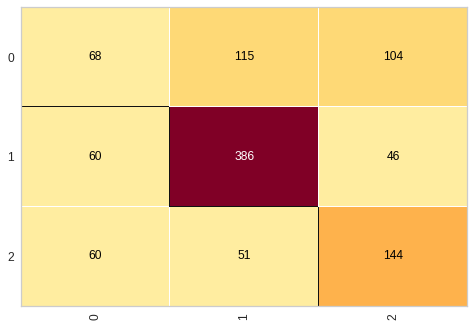

In [99]:
cm = ConfusionMatrix(gridS_arvore)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

#Random Forest

In [139]:
resultados = []

for i in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  floresta = RandomForestClassifier()
  scores = cross_val_score(floresta.fit(x_treino, y_treino), x_treino, y_treino, cv=kfold)
  resultados.append(scores.mean())

print(np.mean(resultados))

0.605974560419005


In [140]:
floresta.feature_importances_

array([0.23199435, 0.12477565, 0.09905504, 0.10003773, 0.11998085,
       0.0985364 , 0.10602569, 0.11959428])

In [109]:
parametros_floresta = {"max_depth": [3, 5, 10],
              "max_features": ["auto", "sqrt", "log2"],
              "min_samples_split": [2, 3, 5, 10],
              "criterion": ["gini", "entropy"],
              "max_leaf_nodes": [5, 10, 20]}

gridS_floresta = GridSearchCV(floresta, parametros_floresta)
gridS_floresta.fit(x_treino, y_treino)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [111]:
gridS_floresta.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'max_leaf_nodes': 10,
 'min_samples_split': 5}

In [112]:
gridS_floresta.best_score_

0.6405642526833821

In [113]:
nova_previsao = gridS_floresta.predict(x_teste)
acuracia = accuracy_score(y_teste, nova_previsao)
f1 = f1_score(y_teste, nova_previsao, average='micro')
print("Acurácia: {}" .format(acuracia*100))
print("F1-Score: {}".format(f1*100))

Acurácia: 62.5725338491296
F1-Score: 62.5725338491296


In [114]:
print(classification_report(y_teste, nova_previsao))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       287
           1       0.65      0.97      0.78       492
           2       0.57      0.66      0.61       255

    accuracy                           0.63      1034
   macro avg       0.41      0.54      0.46      1034
weighted avg       0.45      0.63      0.52      1034



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



0.6218568665377177

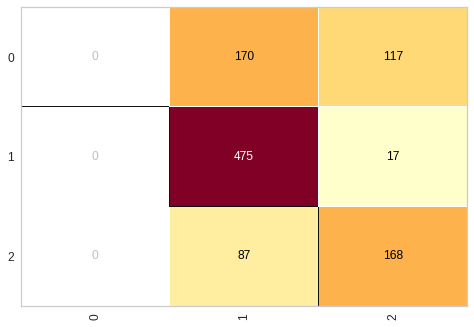

In [115]:
cm = ConfusionMatrix(gridS_floresta)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

#Previsões

In [129]:
vetor = list(range(3466))
dados['id_jogo'] = vetor
dados.head()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,id_jogo
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,0,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90,0
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,0,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58,1
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,1,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64,2
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,1,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84,3
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,2,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89,4


In [130]:
dados.tail()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,id_jogo
3461,Brazil,Serie A,2021,20/06/2021,22:15,Athletico-PR,Atletico GO,2.0,1.0,1,2.04,3.12,4.47,2.07,3.25,4.58,2.02,2.99,4.29,3461
3462,Brazil,Serie A,2021,20/06/2021,22:15,Fortaleza,Fluminense,1.0,1.0,0,2.39,2.97,3.59,2.40,3.08,3.70,2.33,2.94,3.40,3462
3463,Brazil,Serie A,2021,20/06/2021,22:15,Santos,Sao Paulo,2.0,0.0,1,3.27,3.21,2.41,3.27,3.21,2.50,3.06,3.09,2.41,3463
3464,Brazil,Serie A,2021,21/06/2021,00:30,Juventude,Sport Recife,1.0,0.0,1,2.48,2.97,3.41,2.55,3.10,3.49,2.42,2.93,3.21,3464
3465,Brazil,Serie A,2021,22/06/2021,00:00,Atletico-MG,Chapecoense-SC,1.0,1.0,0,1.29,5.79,10.78,1.31,6.03,11.93,1.28,5.43,10.08,3465


In [131]:
previsoes = x[3460:]
jogos = dados['id_jogo']
id_jogo = jogos[3460:]

resultado_cheio = dados['Res']
resultado = resultado_cheio[3460:]

pred = (gridS_floresta.predict(previsoes))
novo = pd.DataFrame({'id_jogo':id_jogo, 'real':resultado, 'previsao':pred})

In [133]:
novo

,id_jogo,real,previsao
3460,3460,0,1
3461,3461,1,1
3462,3462,0,1
3463,3463,1,1
3464,3464,1,1
3465,3465,0,1


0.8333333333333334

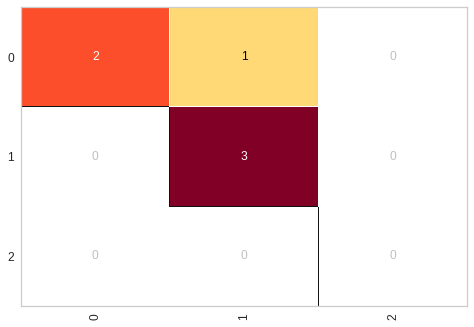

In [136]:
cm = ConfusionMatrix(gridS_arvore)
cm.fit(x_treino, y_treino)
cm.score(previsoes, resultado)